<a href="https://colab.research.google.com/github/maldoroty/DS5220_project/blob/main/SVM_W_Kernal_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for image classification on CIFAR10
First lets import our packages.

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import keras
from keras.datasets import cifar10
import numpy as np

## Loading in data and reshaping
For SVM, we must reshape the data. Since this is an image classifcation problem, each sample is a array of 3 matrices, which correspond to RGB values. So, we reshape the data but flattening each color matrix in each sample into a vector and then concancatening the 3 vectors for each sample.

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(len(X_train), 3*32*32)
y_train = y_train.flatten()

X_test = X_test.reshape(len(X_test), 3*32*32)
y_test = y_test.flatten()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print("# train samples = ", len(X_train))
print("# test samples = ", len(X_test))

# train samples =  50000
# test samples =  10000


## Hyperparam Tuning
Here, we use GridSearchCV to see which combination of parameters works the best on a small sample of the training data. GridSearchCV works by taking in a collection of possible parameter values and then trying every possible combination of them.

In [ ]:
# defining parameter range 
params = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  
   
clf = GridSearchCV(svm.SVC(), params, refit = True, verbose = 3, n_jobs=-1) 
   
# fitting the model for grid search 
clf.fit(X_train[:1000], y_train[:1000])
best_params = clf.best_params_
print(best_params)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


## Training
Using the best parameters selected with GridSearchCV, we use them to train a SVC model. Only training it on 10000 samples currently since using more causes Colab to crash.

In [ ]:
clf = svm.SVC(**best_params)
clf.fit(X_train[:10000], y_train[:10000])


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

iter_vals = [1, 2, 3, 4, 5, 10, 50, 100, 200, 400, 500, 1000]
accs = []
num_samples = 5000

for num_iter in iter_vals:
  print(f"Testing {num_iter} iterations")
  clf = svm.SVC(**best_params)
  clf.fit(X_train[:num_samples], y_train[:num_samples])

  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  accs.append(acc)
  print(f"Acc: {acc}")
  # print(classification_report(y_test, y_pred))


Testing 1 iterations
Acc: 0.4435
Testing 2 iterations
Acc: 0.4435
Testing 3 iterations
Acc: 0.4435
Testing 4 iterations
Acc: 0.4435
Testing 5 iterations
Acc: 0.4435
Testing 10 iterations
Acc: 0.4435
Testing 50 iterations
Acc: 0.4435
Testing 100 iterations


In [ ]:
print(accs)

[0.3603, 0.3603, 0.3603, 0.3603, 0.3603, 0.3603, 0.3603, 0.3603, 0.3603, 0.3603, 0.3603, 0.3603]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

c_vals = [0.01, 0.1, 1, 10, 100]
accs = []
num_samples = 5000

for c in c_vals:
  print(f"Testing C = {c}")
  clf = svm.SVC(C=c)
  clf.fit(X_train[:num_samples], y_train[:num_samples])

  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  accs.append(acc)
  print(f"Acc: {acc}")
  # print(classification_report(y_test, y_pred))


Testing C = 0.01
Acc: 0.1834
Testing C = 0.1
Acc: 0.3515
Testing C = 1
Acc: 0.4435
Testing C = 10
Acc: 0.4494
Testing C = 100
Acc: 0.4457


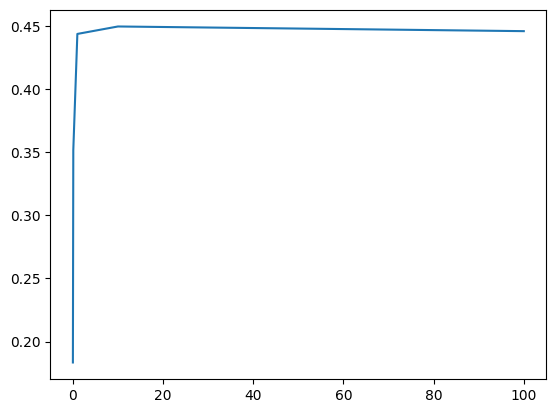

In [ ]:
import matplotlib.pyplot as plt

plt.plot(c_vals, accs)
plt.title("SVM: L-2 Regularization Parameter vs. Accuracy")
plt.
plt.show()

## Model Evaluation
Now that we have a trained model, we can test how well it does by testing it using the test data.

In [ ]:
from sklearn.metrics import classification_report, 

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0.54      0.58      0.56      1000
           2       0.34      0.40      0.37      1000
           3       0.31      0.33      0.32      1000
           4       0.42      0.39      0.40      1000
           5       0.42      0.35      0.38      1000
           6       0.52      0.52      0.52      1000
           7       0.57      0.50      0.53      1000
           8       0.58      0.64      0.61      1000
           9       0.54      0.52      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000

